In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
plt.style.use('fivethirtyeight')

# Normal Distribution
A continuous probability distribution frequently used to represent unknown values in social/natural sciences.

Defined by:
- mu - mean
- sigma - standard deviation

fxn: (1/sqrt(2*pi*sigma^2))^-(((x-mu)^2)/(2*sigma^2))

In [3]:
def norm_form(x, mu, sigma):
    return ((1 / np.sqrt(2 * np.pi * (sigma**2)))
            * np.exp(-(x - mu)**2 / (2 * sigma**2)))

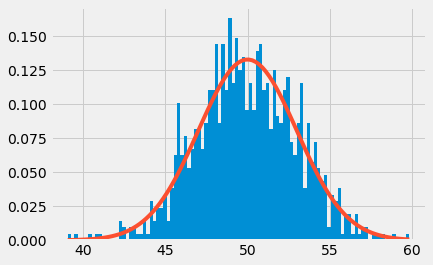

In [4]:
# random samples with numpy
mu = 50
sigma = 3
X = np.random.normal(mu, sigma, 1000)
c, x, p = plt.hist(X, 100, density=True)
plt.plot(x, norm_form(x, mu, sigma))

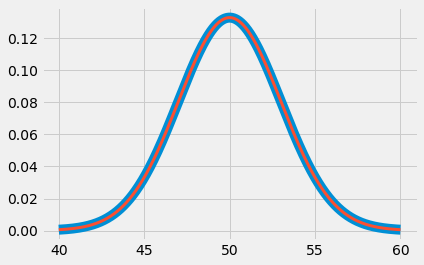

In [5]:
class gaussian(stats.rv_continuous):
    """Gaussian Distribution"""
    
    def _pdf(self, x, mu, sigma):
        """The PDF of a Gaussian Distribution"""
        return norm_form(x, mu, sigma)

# using scipy
g = gaussian()
xs = np.linspace(40,60,1000)
plt.plot(xs, g.pdf(xs, mu, sigma), linewidth=10.0)
plt.plot(xs, stats.norm.pdf(xs, mu, sigma), linewidth=3.0)

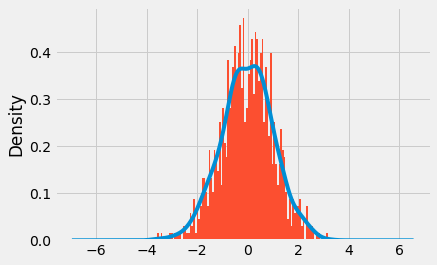

In [24]:
# using pandas/numpy
n_dist = pd.Series(X)
n_dist.plot.density()
hist = n_dist.hist(bins=x, density=True)

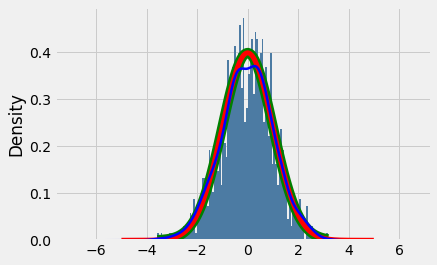

In [12]:
# standard normal distribution with each method
# numpy
s_mu, s_sigma = 0, 1
xs = np.linspace(-5, 5, 1000)
X = np.random.normal(s_mu, s_sigma, 1000)
c, x, p = plt.hist(X, 100, density=True)
plt.plot(x, norm_form(x, s_mu, s_sigma), color='g', linewidth=10.0)

#scipy
plt.plot(xs, g.pdf(xs, s_mu, s_sigma), color='c', linewidth=7.5)
plt.plot(xs, stats.norm.pdf(xs), color='r', linewidth=5.0)

# pandas/numpy
n_dist = pd.Series(X)
n_dist.plot.density(color='b', linewidth=2.5)
hist = n_dist.hist(bins=x, density=True, alpha=0.3)

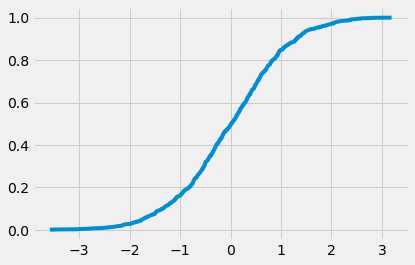

In [28]:
# cdf of normal distribution using pandas
n_dist_pmf = pd.Series()
for i in n_dist.values:
    n_dist_pmf.at[i] = n_dist_pmf.get(i, 0.0) + 1
n_dist_pmf *= (1 / n_dist_pmf.sum())
n_dist_pmf.sort_index(inplace=True)
n_dist_pmf.cumsum().plot()

# Binomial Distribution
A discrete distribution communicating the number of successes of 'n' independent, yes-no experiements, each with a probability of 'p'.

Bernoulli Distribution is a specific form of this in which only two points are shown (a Bernoulli Trial only consists of a single experiement).

Frequently used as the basis for testing statistical significance.

Also used to model success rate of a sample sized n drawn with replacement from a population of size N.

Defined by:
- n - number of trials
- p - probability of each trial